1. 매출성장률
2. 연금보험 -> 월급 -> 직원의 가치
3. 직원 수 (성장률 또는 절대치)

In [252]:
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정

plt.rc('axes', unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [253]:
import pandas as pd
df = pd.read_csv('./data/company_nps_data.csv', encoding='cp949' )
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [26]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [254]:
# 총 기업의 수
len(df['회사ID'].unique())

5000

In [255]:
len_dict = {} # 기간 별 회사 수
id_dict = {} # 기간 별 회사들
df_by_id = df.groupby('회사ID')
for co_id, tmp in df_by_id:
    if id_dict.get(tmp.shape[0]):
        id_dict[tmp.shape[0]].append(co_id)
    else:
        id_dict[tmp.shape[0]] = [co_id]
    len_dict[tmp.shape[0]] = len_dict.get(tmp.shape[0], 0) + 1
     
print(len_dict)

{12: 1771, 8: 40, 10: 45, 2: 239, 50: 14, 11: 79, 7: 39, 9: 44, 4: 35, 24: 579, 38: 809, 5: 32, 3: 30, 1: 39, 6: 34, 26: 420, 36: 284, 13: 22, 37: 14, 14: 267, 35: 4, 21: 13, 25: 23, 31: 8, 32: 6, 33: 8, 48: 5, 22: 22, 20: 7, 23: 18, 18: 8, 27: 2, 16: 5, 17: 7, 30: 5, 29: 2, 15: 3, 46: 1, 19: 8, 34: 6, 28: 3}


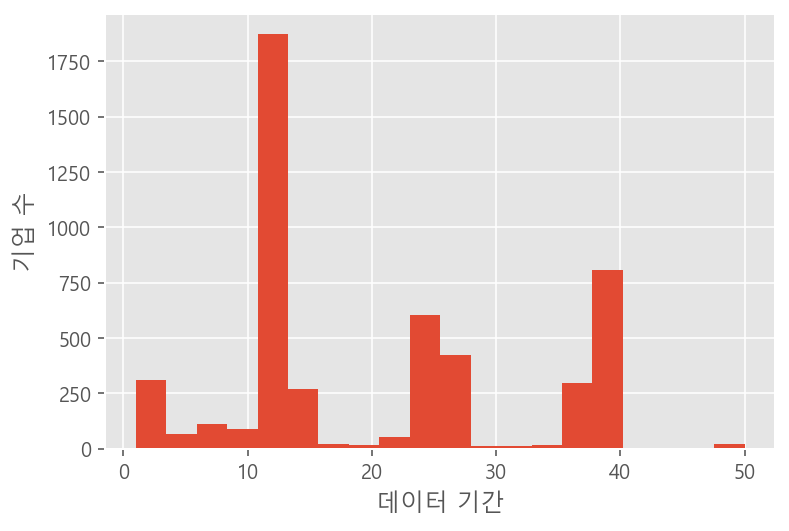

In [256]:
import matplotlib.pyplot as plt

plt.hist(len_dict.keys(), weights=len_dict.values(), bins=20)
plt.xlabel('데이터 기간')
plt.ylabel('기업 수')
plt.show()


In [257]:
# 최소 생존 기간, 최대 생존 기간 
max(len_dict), min(len_dict)

(50, 1)

In [258]:
# 생존 기간이 36개월 이상인 기업의 수 : 1127
sum([val for key, val in len_dict.items() if key>=36])

1127

In [259]:
# 2019년 데이터가 있는 기업의 수
df_2019 = df.loc[df['년도']==2019]
df_2019_by_id = df_2019.groupby('회사ID')
cnt = 0
for co_id, gp in  df_2019_by_id:
    cnt += 1
print(f'2019년 데이터가 있는 기업의 수 : {cnt}')

2019년 데이터가 있는 기업의 수 : 74


In [260]:
## 2019년 12월까지 정보가 있는 기업의 수 
df_2019_12 = df.loc[(df['년도']==2019) & (df['월']==12)]
print(f'2019년 12월까지 정보가 있는 기업의 수 : {df_2019_12.shape[0]}')

2019년 12월까지 정보가 있는 기업의 수 : 74


In [261]:
## 2019년까지 생존하고 있고 생존 기간이 36개월 이상인 기업의 수
candidates_co =[]  # 해당 기업들
for i in range(36, 51):
    if i in id_dict: 
        candidates_co.extend(id_dict[i])

df_candi = df.loc[(df['년도']==2019) & 
                  (df['월']==12) & 
                  (df['회사ID'].isin(candidates_co))]
display(df_candi)
df_candi.shape[0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
5636,130756,3600374,2019,12,13332060,72
6086,419945,10058868796,2019,12,952530380,2872
9869,130023,50504627,2019,12,26049620,97
11859,155754,43590434,2019,12,2490440,11
15155,434171,2776277,2019,12,1842020,5
16142,135668,20471120,2019,12,9918260,36
16738,428380,6653672,2019,12,2998240,9
19621,404192,7092240,2019,12,26649380,95
21146,165163,14221012,2019,12,3536560,14
27371,395238,3948832,2019,12,5415440,26


38

In [262]:
def is_missing_month(data):
    l = data.shape[0]
    r_year, r_month = data.iloc[-1]['년도'], data.iloc[-1]['월'] 
    e_year, e_month = data.iloc[0]['년도'], data.iloc[0]['월']
    cnt = 0
    if r_month - e_month >= 0:
        period = 12*(r_year-e_year) + (r_month - e_month) 
    else:
        period = 12*(r_year-e_year-1) + (12+r_month - e_month)
    if period + 1 == l:
        return True
    return False

In [263]:
# 이렇게 선출 된 회사중에 중간에 결측 월이 있을까?
cnt = 0
for j in df_candi['회사ID'].values:
    data = df_by_id.get_group(j).sort_values(['년도', '월'])
    if not is_missing_month(data):
        cnt += 1
print(f'결측월이 있는 회사의 수 : {cnt}')

결측월이 있는 회사의 수 : 19


* 2019년에 데이터가 있고 3년(36개월)이상의 데이터가 있는 기업에 대해 분석하는게 어떨지
    * 2019년에 데이터가 있는 기업은 12월의 데이터가 무조건 존재

In [264]:
df_candi = df.loc[(df['년도']==2019) &(df['회사ID'].isin(candidates_co))]['회사ID']
candi = df_candi.to_list()

In [267]:
df_dict = {}
for i in candi:
    df_dict[i] = df_by_id.get_group(i).sort_values(['년도','월'])

In [268]:
candi

[395238,
 192812,
 510449,
 135668,
 134575,
 280967,
 395238,
 128174,
 297542,
 294367,
 263195,
 442798,
 442798,
 134575,
 130261,
 130756,
 434171,
 440559,
 130756,
 138077,
 263195,
 419945,
 14271,
 128174,
 404192,
 250472,
 128174,
 442376,
 442467,
 442467,
 442798,
 510449,
 445499,
 165163,
 14271,
 440559,
 14271,
 155754,
 404192,
 130023,
 130261,
 296819,
 280967,
 473265,
 404192,
 165163,
 205415,
 473265,
 130023,
 130023,
 404192,
 155754,
 130756,
 434171,
 419945,
 510449,
 404192,
 445499,
 138077,
 128174,
 434171,
 134575,
 440559,
 250472,
 442525,
 135668,
 128174,
 135668,
 428380,
 135668,
 395238,
 473265,
 263195,
 192812,
 14271,
 442376,
 297682,
 294367,
 404192,
 130023,
 442798,
 434171,
 478922,
 177377,
 237625,
 297682,
 165163,
 303882,
 177377,
 404192,
 473265,
 205415,
 473265,
 305146,
 155754,
 155754,
 14271,
 428380,
 294367,
 442376,
 420165,
 420165,
 434171,
 442798,
 165163,
 434171,
 237625,
 250472,
 205415,
 419945,
 305146,
 47892

In [273]:
tmp = df_dict[445499].groupby(['연매출액', '년도'])
for s, k in tmp:
    print(s, k)

(585959, 2016)          연매출액    년도   월  월별_연금보험료  월별_직원수
35052  585959  2016   1   3692240      19
38350  585959  2016   2   3827240      20
39738  585959  2016   3   2420580      12
90932  585959  2016   4   2420580      12
62079  585959  2016   5   2276580      11
77319  585959  2016   6   2276580      11
35062  585959  2016   7   2258800      11
34810  585959  2016   8   2577400      13
90243  585959  2016   9   2595400      13
68158  585959  2016  10   2595400      13
39573  585959  2016  11   2878000      14
79474  585959  2016  12   2996360      15
(2017051, 2019)           연매출액    년도   월  월별_연금보험료  월별_직원수
44321  2017051  2019   1   1224620       7
36528  2017051  2019   2   1315960       8
51022  2017051  2019   3   1210120       7
8118   2017051  2019   4   1265920       8
42821  2017051  2019   5   1265920       8
86709  2017051  2019   6   1427920       9
13623  2017051  2019   7   1190500       7
43183  2017051  2019   8   1393000       8
66309  2017051  2019   9   1393000  

In [297]:
# 연매출액 관련 함수
def sales(df_dict, k):
    tmp = {}
    df_sale_year = df_dict[k].groupby(['연매출액', '년도'])
    for s, _ in df_sale_year:
        tmp[s[1]] = s[0]
    sale_year = sorted(tmp.items())
    res = []
#     print(sale_year)
    for idx, (y, s) in enumerate(sale_year[:-1]):
        res.append(round((sale_year[idx+1][1]/s-1)*100/(sale_year[idx+1][0]-y), 2))
    return res

In [300]:
# 회사 성장률
for key in df_dict:
    res = sales(df_dict, key)
    print(f"회사ID:{key}, 성장률:{' '.join(tuple(map(str,res)))}")

회사ID:395238, 성장률:21.36 -3.57 3.88 5.01
회사ID:192812, 성장률:9.67 -17.91 -12.82 -25.89
회사ID:510449, 성장률:2.88 6.25
회사ID:135668, 성장률:66.55 -15.94 -2.06 -12.97
회사ID:134575, 성장률:8.29 0.47 3.58 2.37
회사ID:280967, 성장률:346.57 -50.71 7.88
회사ID:128174, 성장률:-4.14 -2.33 -20.1 24.85
회사ID:297542, 성장률:14.08 -1.49 -8.56
회사ID:294367, 성장률:-10.99 18.29 19.15
회사ID:263195, 성장률:125.3 116.52 -21.36
회사ID:442798, 성장률:-2.16 -8.59 -11.83
회사ID:130261, 성장률:-25.89 0.3
회사ID:130756, 성장률:16.38 12.47 12.87 -78.39
회사ID:434171, 성장률:1.02 -14.22 -5.55
회사ID:440559, 성장률:-4.54 5.03
회사ID:138077, 성장률:-6.35 -54.27 4.86 12.95
회사ID:419945, 성장률:10.49 6.84 19.87
회사ID:14271, 성장률:254.96 17.56 67.59 7.76
회사ID:404192, 성장률:16.01 -20.45 6.18 8.93
회사ID:250472, 성장률:19.15 -13.25 -26.9 294.34
회사ID:442376, 성장률:5.32 1.19
회사ID:442467, 성장률:-93.04 497.85 -4.09 159.12
회사ID:445499, 성장률:-84.07 455.08 -18.99
회사ID:165163, 성장률:-7.9 -8.2 10.62
회사ID:155754, 성장률:-7.38 9.08 3.11 14.37
회사ID:130023, 성장률:-11.7 23.42 -1.17
회사ID:296819, 성장률:41.26 31.51 11.82 12.81
회사